<a href="https://colab.research.google.com/github/carvalheirafc/dim0097/blob/master/lista2/Resposta_da_Lista_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

## Group
* Airton Everton;
* Carlos Frederico.

## OBS Professor

A seção abaixo("Download files from Drive") não precisa ser executada, é só fazer o upload dos arquivos no menu lateral esquerdo e verificar se os nome estão iguais aos nomes da seção "Load Files".

# Download files from Drive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# id folder shared in drive
id_folder_drive = '1GzyTLpVTmq5MkdtUiaPaYmQX-YQJtPil'

# get all files in folder
file_list = drive.ListFile({ 'q': "'%s' in parents and trashed=false" % id_folder_drive }).GetList()

for f in file_list:
  # files filter
  if '.ipynb' not in f['title'] and '.pdf' not in f['title']:
    # download file
    f.GetContentFile(f['title'])

# Imports

In [ ]:
import cv2
import imutils
from PIL import Image
import numpy as np
from numpy import fft
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans, DBSCAN
from pylab import rcParams
from scipy import stats
import seaborn as sn
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Load Files

In [ ]:
conjunto2 = pd.read_excel('Lista1_Conjunto2.xlsx')

# Question 1

In [ ]:
# data cleaning
conj2 = conjunto2.dropna(how='all').dropna(axis=1, how='all')
conj2.columns = conj2.iloc[0]
conj2 = conj2[1:].astype('float32').reset_index(drop=True)
conj2

1,V1,V2,V3,V4,V5,V6,Classes
0,6.3,3.3,7.65,6.0,36.000000,2.5,3.0
1,5.8,2.7,7.55,5.1,26.010000,1.9,3.0
2,5.1,3.5,4.95,1.4,1.960000,0.2,1.0
3,4.9,3.0,5.30,1.4,1.960000,0.2,1.0
4,4.7,3.2,4.60,1.3,1.690000,0.2,1.0
...,...,...,...,...,...,...,...
145,6.7,3.1,8.75,5.6,31.360001,2.4,3.0
146,6.9,3.1,9.15,5.1,26.010000,2.3,3.0
147,5.8,2.7,7.55,5.1,26.010000,1.9,3.0
148,5.0,3.3,5.05,1.4,1.960000,0.2,1.0


## a)

In [ ]:
print('Rank:', np.linalg.matrix_rank(conj2))
print('V1 e V3 são colineares.')

Rank: 6
V1 e V3 são colineares.


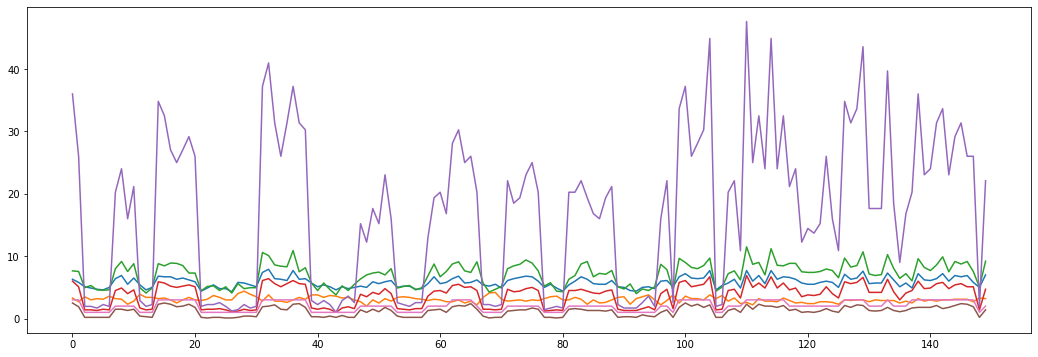

In [ ]:
plt.rcParams['figure.figsize'] = 18, 6
plt.plot(conj2)
plt.show()

# É perceptível uma certa semelhança nas curvas, mas aparentemente estão em escalas diferente, pois por exemplo a lilás possui valores bem maiores.

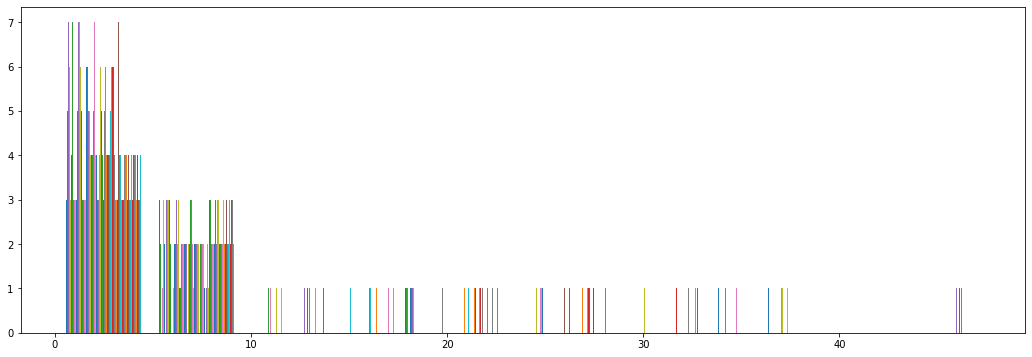

In [ ]:
plt.hist(conj2)
plt.show()

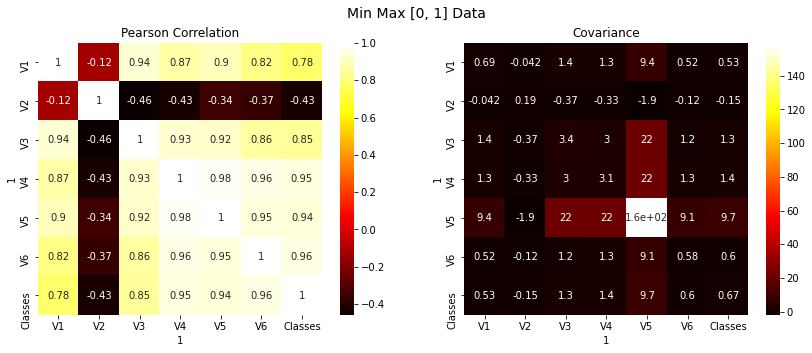

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Min Max [0, 1] Data', fontsize=14)

ax = sn.heatmap(conj2.corr(method='pearson'), ax=ax[0], annot=True, cmap='hot')
ax.set_title('Pearson Correlation')

ax = sn.heatmap(conj2.cov(), annot=True, cmap='hot')
ax.set_title('Covariance')

plt.show()

## b)

Reaproveitando as corelações do grafico acima(alternativa "a"), podemos perceber que todas as variaveis possuem uma grande corelação com o target(Classes)

&&&&&&&&&&&&&&&&&&&&&

Calcule e analise a correlação de cada “atributo” com o Target (Classes)

## c)

## d)

# Question 2

In [ ]:
X = conj2.loc[:, conj2.columns !='Classes']
columns_names = X.columns
Classes = conj2['Classes']
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1,,,,,,,,
V1,150.0,5.843333,0.828066,4.3,5.1000,5.800,6.4000,7.900000
V2,150.0,3.057333,0.435866,2.0,2.8000,3.000,3.3000,4.400000
V3,150.0,7.100669,1.850630,3.8,5.1625,7.400,8.5875,11.500000
V4,150.0,3.758000,1.765298,1.0,1.6000,4.350,5.1000,6.900000
V5,150.0,17.218063,12.627045,1.0,2.5600,18.925,26.0100,47.610001
V6,150.0,1.199334,0.762238,0.1,0.3000,1.300,1.8000,2.500000


## a) Normalização do conjunto de dados.
> Foi utilizado o método 'StandardScaler' do sklean. Que utiliza o **z-score**.

> Por questões de preferencia não normalizei a coluna de classes.


In [ ]:
X_std = preprocessing.StandardScaler().fit_transform(X)

norm = pd.DataFrame(data = X_std, columns=columns_names)
conj2_std = pd.concat([norm, Classes], axis=1)

print(conj2_std.describe().transpose())
conj2_std.head()

         count          mean       std  ...       50%       75%       max
V1       150.0  2.384186e-09  1.003350  ... -0.052506  0.674501  2.492019
V2       150.0  9.874503e-08  1.003350  ... -0.131979  0.558611  3.090775
V3       150.0 -1.827876e-08  1.003350  ...  0.162289  0.806112  2.385172
V4       150.0  1.708666e-08  1.003350  ...  0.336478  0.762758  1.785832
V5       150.0 -1.033147e-08  1.003350  ...  0.135634  0.698611  2.414956
V6       150.0 -2.006690e-08  1.003350  ...  0.132510  0.790671  1.712096
Classes  150.0  2.000000e+00  0.819232  ...  2.000000  3.000000  3.000000

[7 rows x 8 columns]


,V1,V2,V3,V4,V5,V6,Classes
0,0.553334,0.558611,0.297830,1.274295,1.492420,1.712096,3.0
1,-0.052506,-0.822570,0.243614,0.762758,0.698611,0.922303,3.0
2,-0.900681,1.019004,-1.166020,-1.340227,-1.212412,-1.315444,1.0
3,-1.143017,-0.131979,-0.976261,-1.340227,-1.212412,-1.315444,1.0
4,-1.385353,0.328414,-1.355778,-1.397064,-1.233867,-1.315444,1.0


## b) Os autovetores e Autovalores
> Foram calculados usando a matriz de covariância dos dados já normalizados.

In [ ]:
X_cov = np.cov(X_std.T)
eigenvals, eigenvecs = np.linalg.eig(X_cov)
print(eigenvals)
print(eigenvecs)

[[ 1.0067114  -0.11835888  0.94272226  0.87760449  0.90353914  0.82343068]
 [-0.11835888  1.00671142 -0.46157539 -0.43131556 -0.34377691 -0.36858317]
 [ 0.94272226 -0.46157539  1.00671143  0.93774707  0.93002998  0.86710444]
 [ 0.87760449 -0.43131556  0.93774707  1.00671141  0.99042679  0.96932763]
 [ 0.90353914 -0.34377691  0.93002998  0.99042679  1.00671144  0.95227291]
 [ 0.82343068 -0.36858317  0.86710444  0.96932763  0.95227291  1.00671143]]
[4.84299686e+00 9.30251385e-01 2.17103427e-01 4.06736815e-02
 1.65286247e-14 9.24318578e-03]
[[ 4.16431342e-01 -3.41628395e-01 -5.12495818e-01 -1.76657054e-01
  -6.44890010e-01  1.14966598e-02]
 [-1.98529478e-01 -9.34262105e-01  1.32298404e-01  2.09577312e-02
   2.54586388e-01 -7.05977456e-02]
 [ 4.42802610e-01  2.43367051e-02 -5.05372446e-01 -1.65494727e-01
   7.20626565e-01  3.52294564e-02]
 [ 4.50803039e-01  6.56885565e-03  2.45796180e-01  2.84203480e-01
  -2.97739378e-08 -8.09658008e-01]
 [ 4.47200458e-01 -9.21352030e-02  2.05621625e-01  6

## c) Descorrelação dos dados

> Foi utilizado para isso o autovetor calculado acima.

In [ ]:
decorrelated = X_std.dot(eigenvecs)
pd.DataFrame(np.cov(decorrelated.T))

,0,1,2,3,4,5
0,4.842997e+00,4.653586e-16,-3.312125e-15,1.877313e-15,7.827939e-16,3.136728e-16
1,4.653586e-16,9.302514e-01,-1.614805e-16,-3.247006e-16,-4.933799e-16,3.508689e-16
2,-3.312125e-15,-1.614805e-16,2.171034e-01,-6.808726e-17,3.658682e-16,-3.710576e-16
3,1.877313e-15,-3.247006e-16,-6.808726e-17,4.067368e-02,-1.821691e-16,-2.422925e-18
4,7.827939e-16,-4.933799e-16,3.658682e-16,-1.821691e-16,1.666087e-14,1.679392e-16
5,3.136728e-16,3.508689e-16,-3.710576e-16,-2.422925e-18,1.679392e-16,9.243186e-03


## d) Grau de informação de cada Variável do conjunto de dados.
> Usando o conjunto de dados normalizado pelo z-score e descorrelacionado, 
fizemos um gráfico onde é mostrada a soma acumulativa da variância de cada variável do conjunto e em seguida foi mostrado na tela a variância de cada uma.

> Podemos ver no gráfico que com duas variáveis apenas temos quase que a totalidade dessa soma.
> Sendo assim será criado um novo conjunto de dados, com apenas as novas variáveis.

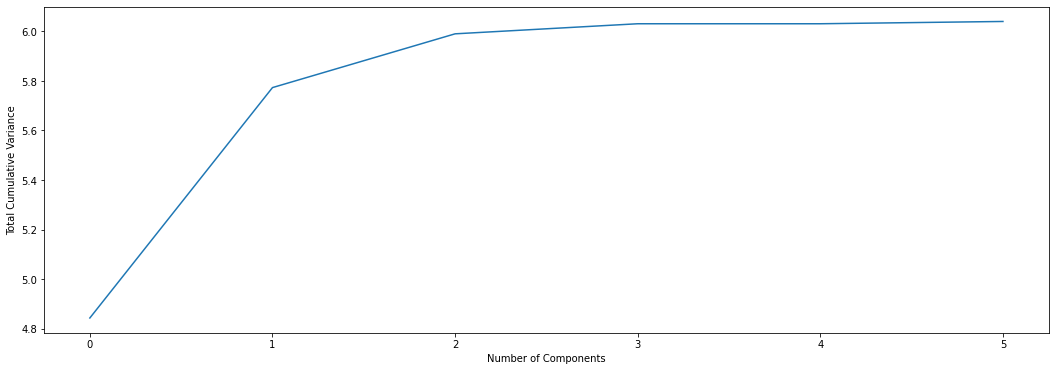

0    4.842997e+00
1    9.302514e-01
2    2.171034e-01
3    4.067368e-02
4    1.666087e-14
5    9.243186e-03
dtype: float64


In [ ]:
plt.plot(np.cumsum(pd.DataFrame(decorrelated).var()))
plt.xlabel('Number of Components')
plt.ylabel('Total Cumulative Variance')
plt.show()

print(pd.DataFrame(decorrelated).var())

## e) Seleção do novo Conjunto de dados
> Foi então criado um novo conjunto de dados usando apenas duas das variáveis do conjunto descorrelacionado, baseado na variância acima, selecionarei as duas mais altas, no caso a variável **0**, e **1**

In [ ]:
conj2_std_reduced = pd.DataFrame(data=decorrelated, columns=['0', '1', '2', '3', '4', '5'])
conj2_std_reduced = conj2_std_reduced[['0', '1']]
conj2_std_reduced = pd.concat([conj2_std_reduced, conj2['Classes']], axis = 1)
conj2_std_reduced.head()

,0,1,Classes
0,2.235392,-0.895013,3.0
1,1.305364,0.699496,3.0
2,-2.810249,-0.522001,1.0
3,-2.598636,0.640727,1.0
4,-2.994222,0.285754,1.0


## f) PCA Sklearn
> Usando o objeto **PCA** fornecido pelo sklearn foi feita em primeiro lugar a verificação de quantos componentes finais o conjunto ficaria. De forma similar foi feita uma soma acumulativa dos valores das variancias do conjunto, mas dessa vez foi utilizado o método interno do objeto **pca**

> Similarmente ao método anterior, cerca de 97% de toda a variância do conjunto está em apenas duas das variáveis do mesmo.

> Então foi-se escolhido o valor de 2 para o numero de componentes finais.

> Os dados obtidos então usando os métodos ja criar pela api **sklearn** foram similares ao feitos manualmente. Isso aconteceu de fato pois as etapas B, C, D, E da ativide são exatamente passos feitos pela função PCA, calcula-se os autovalores e autovetores, descorrelaciona o conjunto de dados usando um produto do mesmo com o autovetor, e em seguida com os dados transformados nos novos eixos, são selecionados então as novas variáveis.

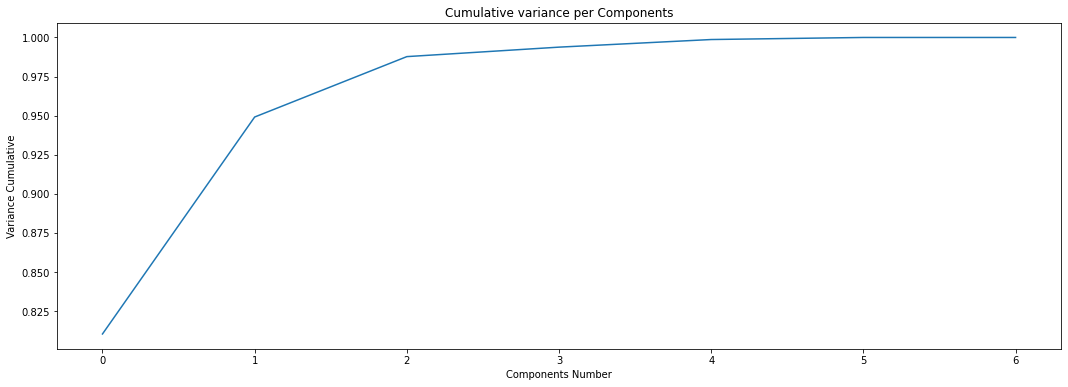

In [ ]:
pca = PCA()
pca.fit(conj2_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components Number')
plt.ylabel('Variance Cumulative')
plt.title('Cumulative variance per Components')
plt.show()

In [ ]:
pca = PCA(n_components = 2)

x = conj2_std.loc[:, conj2_std.columns !='Classes'].values
x = preprocessing.StandardScaler().fit_transform(x)

y = conj2_std.loc[:, 'Classes'].values


principalComponents = pca.fit_transform(x)


classes = pd.DataFrame(data=y.flatten(), columns=['Classes'])
conjunto2_principal_components= pd.DataFrame(data = principalComponents, 
                                             columns= ['Component 1', 
                                                       'Component 2'])


conjunto2_principal_components = pd.concat([conjunto2_principal_components, 
                                           classes], axis = 1)
conjunto2_principal_components.head()

,Component 1,Component 2,Classes
0,2.235390,0.895014,3.0
1,1.305364,-0.699497,3.0
2,-2.810250,0.522001,1.0
3,-2.598636,-0.640727,1.0
4,-2.994222,-0.285755,1.0


# Question 3

## a)

## b)

## c)

## d)